<a href="https://colab.research.google.com/github/gabrielrflopes/estudos/blob/main/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CognitiveClass.ai - Data Analysis with Python

As part of the Data Analysis with Python course, in this notebook we will study the data from 1985 automobiles, in order to train exploratory data analysis, data wrangling, model development and model evaluation with a real world dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'  

df = pd.read_csv(data, header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Variable dictionary

Below are the lists of attributes of the autos dataset.

1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized-losses`: continuous from 65 to 256.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.

### Defining the headers for the dataset

In [ ]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
           'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
           'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df.columns = headers

print('The name of the columns in the dataset:\n\n', 
      df.columns)

The name of the columns in the dataset:

 Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Wrangling

In [ ]:
print('This dataset has:',
      '\n{} entries'.format(df.shape[0]),
      '\n{} variables'.format(df.shape[1]))

This dataset has: 
205 entries 
26 variables


In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We notice that some of the variables are in the incorrect format, such as `bore` and `price`. Analysing the data, some columns has rows filled with '?', that are not informative and inables us to convert the variables to the correct format. 

In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df.price = pd.to_numeric(df.price, errors = 'coerce')

df.price.dtypes

dtype('float64')

### Converting the values

In [ ]:
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['bore'] = df['bore'].astype('float')
df['stroke'] = df['stroke'].astype('float')
df['horsepower'] = df['horsepower'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
missing_values = (df.isna().sum() / df.shape[0] * 100).sort_values(ascending = False)[:10]

missing_values

normalized-losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak-rpm              0.97561
num-of-doors          0.97561
horsepower            0.97561
engine-type           0.00000
highway-mpg           0.00000
city-mpg              0.00000
dtype: float64

### How to deal with missing data?

**Drop data**

a. Drop the whole row

b. Drop the whole column

**Replace data**

a. Replace it by mean

b. Replace it by frequency

c. Replace it based on other functions

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. 

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

**Replace by mean:**

- normalized-losses: 41 missing data, replace them with mean
- stroke: 4 missing data, replace them with mean
- bore: 4 missing data, replace them with mean
- horsepower: 2 missing data, replace them with mean
- peak-rpm: 2 missing data, replace them with mean

**Replace by frequency:**

- num-of-doors: 2 missing data, replace them with "four".

Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

**Drop the whole row:**

- price: 4 missing data, simply delete the whole row

Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

**Removing the rows of missing values in `price`**

In [ ]:
df_clean = df.copy()

df_clean.dropna(subset = ['price'], axis = 0, inplace = True)

df_clean.isna().sum().sort_values(ascending = False )[:10]

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
symboling             0
engine-type           0
highway-mpg           0
city-mpg              0
dtype: int64

### Replacing the missing values

We will replace all the NaN in these variables with their respective mean values.

**`Normalized-losses`**

In [ ]:
avg_norm_loss = df_clean['normalized-losses'].mean()
print('Average of normalized-loss:', avg_norm_loss)

Average of normalized-loss: 122.0


In [ ]:
df_clean['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

**`bore`**

In [ ]:
avg_bore = df_clean['bore'].mean().round(1)
print('Average of bore:', avg_bore)

Average of bore: 3.3


In [ ]:
df_clean['bore'].replace(np.nan, avg_bore, inplace = True)

**`stroke`**

In [ ]:
avg_stroke = df_clean['stroke'].mean().round(1)
print('Average of stroke:', avg_stroke)

Average of stroke: 3.3


In [ ]:
df_clean['stroke'].replace(np.nan, avg_stroke, inplace = True)

**`horsepower`**

In [ ]:
avg_hp = df_clean['horsepower'].mean().round(1)
print('Average of horsepower:', avg_hp)

Average of horsepower: 103.4


In [ ]:
df_clean['horsepower'].replace(np.nan, avg_hp, inplace = True)

**`peak-rpm`**

In [ ]:
avg_peakrpm = df_clean['peak-rpm'].mean().round(1)
print('Average of peak-rpm:', avg_peakrpm)

Average of peak-rpm: 5117.6


In [ ]:
df_clean['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)

### Replace by frequency

For the variable `num-of-doors` we will replace the missing values with the most frequent value.

In [ ]:
df_clean['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [ ]:
df_clean['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df_clean['num-of-doors'].replace(np.nan, 'four', inplace = True)

We have succesfully removed all missing values from our dataset and stored on `df_clean`.

In [ ]:
(df_clean.isna().sum() / df_clean.shape[0] * 100).sort_values(ascending = False)[:10]

symboling            0.0
normalized-losses    0.0
highway-mpg          0.0
city-mpg             0.0
peak-rpm             0.0
horsepower           0.0
compression-ratio    0.0
stroke               0.0
bore                 0.0
fuel-system          0.0
dtype: float64

In [ ]:
# We will convert the normalized-losses column to int64

df_clean['normalized-losses'] = df_clean['normalized-losses'].astype('int64')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### Data formatting

We want to convert the values of the variable `city-mpg` from miles per gallon to liters per Km. To do this, we will use data formatting in the column.

In [ ]:
df_clean['city-mpg'] = 235 / df_clean['city-mpg']

df_clean.rename(columns = {'city-mpg': 'city-L/Km'}, inplace = True)

We'll do the same thing for the `highway-mpg` variable, turning it into `highway-L/Km`.

In [ ]:
df_clean['highway-mpg'] = 235 / df_clean['highway-mpg']

df_clean.rename(columns = {'highway-mpg': 'highway-L/Km'}, inplace = True)

In [ ]:
df_clean.head().round(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/Km,highway-L/Km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111.0,5000.0,11.2,8.7,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111.0,5000.0,11.2,8.7,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.7,3.5,9.0,154.0,5000.0,12.4,9.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.2,3.4,10.0,102.0,5500.0,9.8,7.8,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.2,3.4,8.0,115.0,5500.0,13.1,10.7,17450.0


### Data normalization

In [ ]:
# Simple feature scaling method
df_clean['length'] = df_clean['length'] / df_clean['length'].max() 
df_clean['width'] = df_clean['width'] / df_clean['width'].max()
df_clean['height'] = df_clean['height'] / df_clean['height'].max()

Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].

In [ ]:
df_clean[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Bining

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

**Example:**

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [ ]:
# Converting horsepower to int64]

df_clean['horsepower'] = df_clean['horsepower'].astype('int64')

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>

In [ ]:
bins = np.linspace(min(df_clean['horsepower']), max(df_clean['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group names

In [ ]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.

In [ ]:
df_clean['horsepower-binned'] = pd.cut(df_clean['horsepower'], bins, labels = group_names, include_lowest = True)

# pd.cut() - Bin values into discrete intervals.

# Use cut when you need to segment and sort data values into bins. This
# function is also useful for going from a continuous variable to a
# categorical variable.

df_clean[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


In [ ]:
df_clean['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

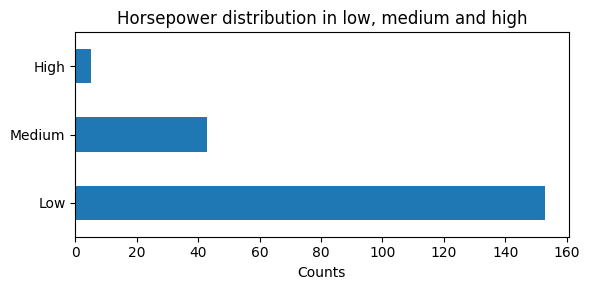

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))

df_clean['horsepower-binned'].value_counts().plot(kind = 'barh')

ax.set_title('Horsepower distribution in low, medium and high')
ax.set_xlabel('Counts')

fig.tight_layout()
fig.show()

### Indicator variable

<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [ ]:
df_clean['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

To get the indicator variables from the `fuel-type` variable, we can use the `pd.get_dummies()` function.

In [ ]:
# Assigning the indicator variables into a new dataframe called dummy_variable
dummy_variable = pd.get_dummies(df['fuel-type'])

dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We will change the columns names for clarity

In [ ]:
dummy_variable.rename(columns = {'diesel': 'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace = True)

dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Now we will merge the two dataframes using `pd.concat()`.

In [ ]:
df_clean = pd.concat([df_clean, dummy_variable], axis = 1)

Now that we have the two columns with indicator variables refering to the fuel type, we can drop the `fuel-type` variable from the dataset.

In [ ]:
df_clean.drop('fuel-type', axis = 1, inplace = True)

df_clean.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3.0,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3.0,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1.0,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2.0,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2.0,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1


### Creating an indicator variable for the `aspiration` column

In [ ]:
df_clean['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [ ]:
dummy_variable_asp = pd.get_dummies(df_clean['aspiration'])

dummy_variable_asp.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
dummy_variable_asp.rename(columns = {'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace = True)

dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df_clean = pd.concat([df_clean, dummy_variable_asp], axis = 1)

In [ ]:
df_clean.drop('aspiration', axis = 1, inplace = True)

df_clean.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3.0,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3.0,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1.0,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2.0,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2.0,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


In [ ]:
print('DataFrame dimensions:\n', 
      '\nBefore:', df.shape,
      '\nAfter:', df_clean.shape)

DataFrame dimensions:
 
Before: (205, 26) 
After: (205, 29)


Notice that the DataFrame after should have 201 entries instead of 205. This means that our new columns have rows that don't correspond to any datapoint.

Let's check the last 5 entries to be sure:

In [ ]:
df_clean.tail()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
204,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,12.368421,9.4,22625.0,Low,0,1,0,1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


As you can see, the last 4 rows are filled with NaN, except for the dummy variables columns. We will drop these rows in order to get the DataFrame in order again.

In [ ]:
df_clean.drop(index = [9, 44, 45, 129], axis = 0, inplace = True)

df_clean.tail()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/Km,highway-L/Km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
200,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,10.217391,8.392857,16845.0,Low,0,1,1,0
201,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,160.0,5300.0,12.368421,9.400000,19045.0,Medium,0,1,0,1
202,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,134.0,5500.0,13.055556,10.217391,21485.0,Medium,0,1,1,0
203,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,106.0,4800.0,9.038462,8.703704,22470.0,Low,1,0,0,1
204,-1.0,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114.0,5400.0,12.368421,9.400000,22625.0,Low,0,1,0,1


### Saving the cleaned dataframe to csv format

In [ ]:
df_clean.to_csv('clean_df.csv')

## Exploratory Data Analysis

### Variables correlation

The correlation between the bore, stroke, horsepower and compression-ratio variables.

In [ ]:
data_corr = df_clean[['stroke','peak-rpm', 'horsepower', 'engine-size', 'price']].corr()

data_corr

,stroke,peak-rpm,horsepower,engine-size,price
stroke,1.000000,-0.058675,0.098026,0.202200,0.082188
peak-rpm,-0.058675,1.000000,0.107882,-0.256753,-0.101542
horsepower,0.098026,0.107882,1.000000,0.822636,0.809729
engine-size,0.202200,-0.256753,0.822636,1.000000,0.872335
price,0.082188,-0.101542,0.809729,0.872335,1.000000


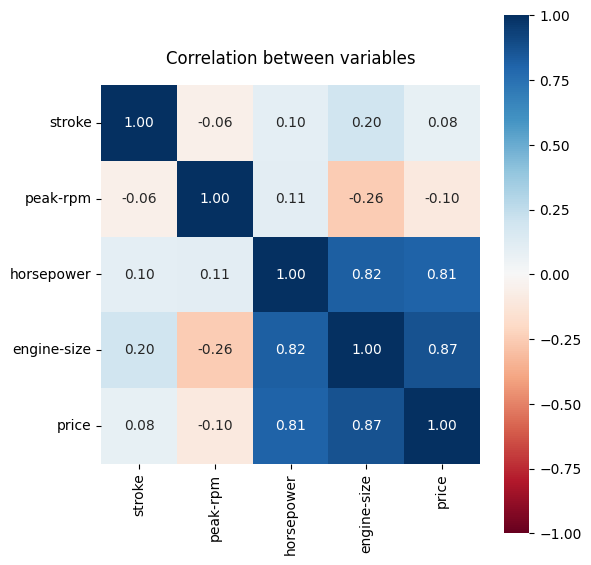

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (6, 6))

sns.heatmap(data_corr, 
            vmin = -1, 
            square = True, 
            cmap = 'RdBu', 
            cbar = True, 
            annot = True,
            fmt = '.2f')

ax.set_title('Correlation between variables', pad = 15)

fig.tight_layout()
fig.show()

### Linear relationship between variables

For continuous variables, we use the scatter plots to see the relationship between variables. For this purpose, we define a predictor variable, also called independent variable, for the x-axis, and a target (or dependent) variable, for the y-axis.

Below are two examples of two variables that tries to predict the price of the cars. The first one, engine-size gives a strong correlation, and the second one, 'stroke', gives a weak correlation.

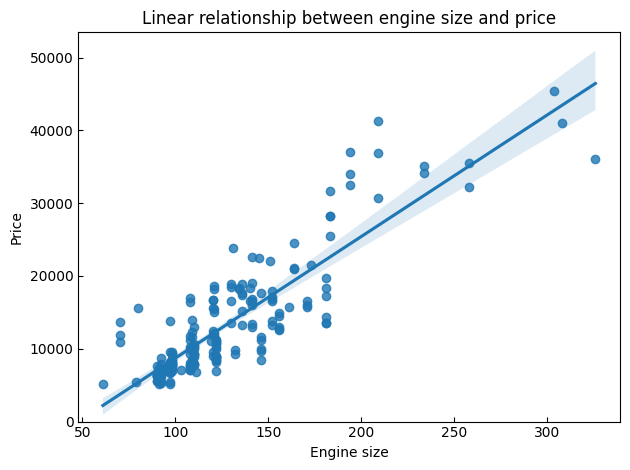

In [ ]:
# Engine size as a potential predictor of price
fig, ax = plt.subplots()

sns.regplot(x = 'engine-size', y = 'price', data = df_clean)

ax.set_ylim(0,)
ax.set_title('Linear relationship between engine size and price')
ax.set_xlabel('Engine size')
ax.set_ylabel('Price')
ax.tick_params(axis = 'both', direction = 'in')

fig.tight_layout()
fig.show()

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

### Weak linear correlation

<Axes: xlabel='stroke', ylabel='price'>

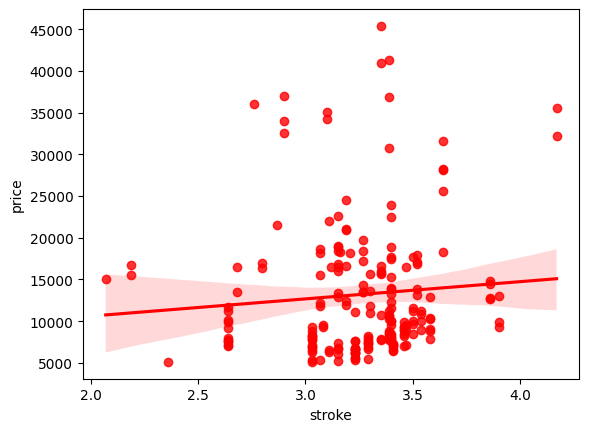

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x = 'stroke', y = 'price', data = df_clean, 
            color = 'r')

### Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship between "body-style" and "price".

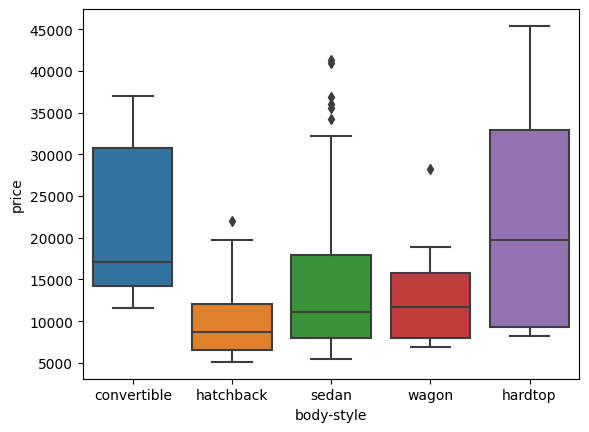

In [ ]:
sns.boxplot(x = 'body-style', y = 'price', data = df_clean);

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":

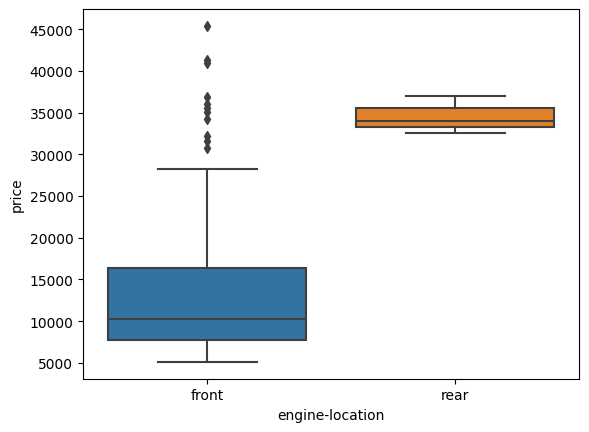

In [ ]:
sns.boxplot(x = 'engine-location', y = 'price', data = df_clean);

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price".

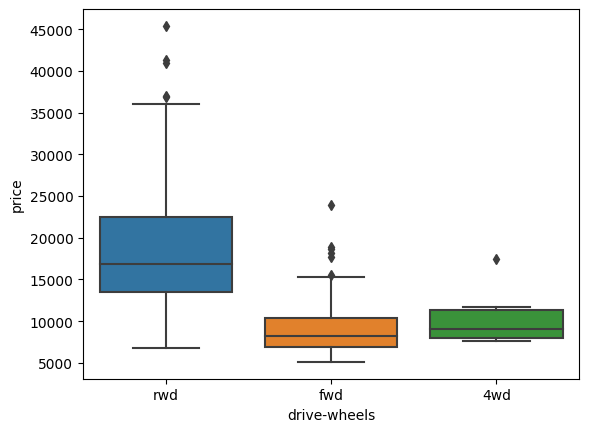

In [ ]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df_clean);

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

We can have a statistical summary of the categorical variables using the `.describe` method with the argument `include = ['object']`.


In [ ]:
df_clean.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


### Basics of grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [ ]:
df_grouped = df_clean[['price', 'drive-wheels', 'body-style']]

You can group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_test1'.

In [ ]:
# grouping results
df_grouped = df_grouped.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

df_grouped.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [ ]:
grouped_pivot = df_grouped.pivot(index = 'drive-wheels', columns = 'body-style')

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [ ]:
grouped_pivot = grouped_pivot.fillna(0)

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Variables: Drive Wheels and Body Style vs. Price**

Let's use a heat map to visualize the relationship between Body Style vs Price.

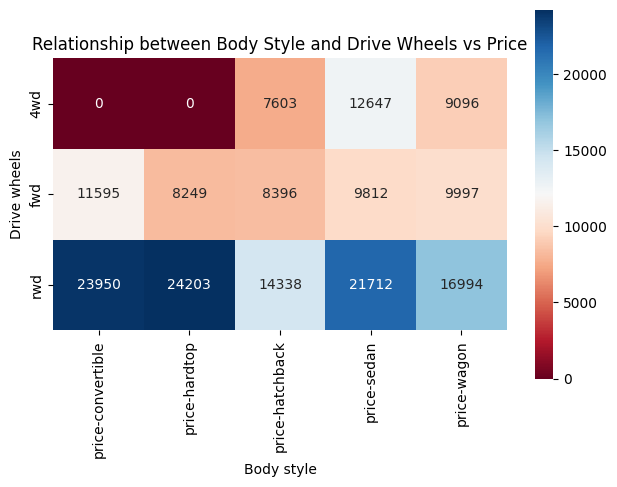

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(grouped_pivot, 
            cmap = 'RdBu', 
            square = True, 
            annot = True, 
            fmt = '.0f')

ax.set_title('Relationship between Body Style and Drive Wheels vs Price')
ax.set_xlabel('Body style')
ax.set_ylabel('Drive wheels')

fig.tight_layout()
fig.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

### Correlation and causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

#### Pearson Correlation

<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the


- p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
- the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
- the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
- the p-value is $>$ 0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.

In [ ]:
from scipy import stats as st

<h4>Horsepower vs. Price</h4>

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['horsepower'], df_clean['price'])

print('The Pearson Correlation Coefficient is', pearson_coef, ' with a P-value of P = ', p_value)  

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P =  5.924001027593321e-48


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

<h4>Wheel-base vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['horsepower'], df_clean['price'])

print(f'The Pearson Correlation Coefficient is {pearson_coef} with a P-value of P = {p_value}')

The Pearson Correlation Coefficient is 0.8097290352560285 with a P-value of P = 5.924001027593321e-48


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

<h4>Length vs. Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['length'], df_clean['price'])

print(f'The Pearson Correlation Coeficiente is {pearson_coef} with a P-value of P = {p_value}')

The Pearson Correlation Coeficiente is 0.6906283804483639 with a P-value of P = 8.01647746615924e-30


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

<h4>Width vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['width'], df_clean['price'])

print(f'The Pearson Correlation Coefficient is {pearson_coef} with a P-value of P = {p_value}')

The Pearson Correlation Coefficient is 0.7512653440522673 with a P-value of P = 9.20033551048206e-38


**Conclusion:**

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

<h4>Curb-Weight vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['curb-weight'], df_clean['price'])

print('The Pearson Correlation Coefficient is {:.2f}'.format(pearson_coef), 'with a p-value of P = {}'.format(p_value))

The Pearson Correlation Coefficient is 0.83 with a p-value of P = 2.189577238893965e-53


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.83).

<h4>Engine-Size vs. Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['engine-size'], df_clean['price'])

print('The Pearson Correlation Coefficient is {:.2f}'.format(pearson_coef), 'with a p-value of P = {}'.format(p_value))

The Pearson Correlation Coefficient is 0.87 with a p-value of P = 9.265491622198793e-64


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is quite strong (~ 0.87).

<h4>Bore vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['bore'], df_clean['price'])

print('The Pearson Correlation Coefficient is {:.2f}'.format(pearson_coef), 'with a P-value of P = {}'.format(p_value)) 

The Pearson Correlation Coefficient is 0.54 with a P-value of P = 8.071098663263676e-17


**Conclusion:**

Since the p-value is much lower than 0.001, the correlation between bore and price is statistically significant, although the linear relationship between the two variable is weak (~ 0.54).

<h4>highway-L/Km vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['highway-L/Km'], df_clean['price'])

print('The Pearson Correlation Coefficient is {:.2f}'.format(pearson_coef), 'with a P-value of P = {}'.format(p_value)) 

The Pearson Correlation Coefficient is 0.80 with a P-value of P = 3.0467845810414008e-46


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between highway-L/Km and price is statistically significant, and the linear relationship is quite strong (~ 0.80).

<h4>city-L/Km vs Price</h4>

In [ ]:
pearson_coef, p_value = st.pearsonr(df_clean['city-L/Km'], df_clean['price'])

print('The Pearson Correlation Coefficient is {:.2f}'.format(pearson_coef), 'with a P-value of P = {}'.format(p_value)) 

The Pearson Correlation Coefficient is 0.79 with a P-value of P = 3.9031064009394357e-44


**Conclusion:**

Since the p-value is $<$ 0.001, the correlation between city-L/Km and price is statistically significant, and the linear relationship is quite strong (~ 0.79).

### ANOVA: Analysis of Variance

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score:** ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value:** P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

<h4>Drive-Wheels</h4>

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data.  

In [ ]:
grouped_df2 = df_clean[['drive-wheels', 'price']].groupby(['drive-wheels'])

The `get_group() method enables us to select one group from the variable.

In [ ]:
grouped_df2.get_group('4wd')['price']

4      17450.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [ ]:
# ANOVA
f_test, p_val = st.f_oneway(grouped_df2.get_group('fwd')['price'], 
                            grouped_df2.get_group('4wd')['price'],
                            grouped_df2.get_group('rwd')['price'])

print('ANOVA results:\n',
      '\nF-test score:', f_test,
      '\nP-value:', p_val)

ANOVA results:
 
F-test score: 67.95406500780398 
P-value: 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

In [ ]:
f_test, p_val = st.f_oneway(grouped_df2.get_group('fwd')['price'], 
                            grouped_df2.get_group('4wd')['price'])

print('ANOVA results:\n',
      '\nF-test score:', f_test,
      '\nP-value:', p_val)

ANOVA results:
 
F-test score: 0.6654657502523033 
P-value: 0.41620116697845666


In [ ]:
f_test, p_val = st.f_oneway(grouped_df2.get_group('rwd')['price'], 
                            grouped_df2.get_group('4wd')['price'])


print('ANOVA results:\n',
      '\nF-test score:', f_test,
      '\nP-value:', p_val)

ANOVA results:
 
F-test score: 8.580681368924756 
P-value: 0.004411492211225333


In [ ]:
f_test, p_val = st.f_oneway(grouped_df2.get_group('fwd')['price'],
                            grouped_df2.get_group('rwd')['price'])

print('ANOVA results:\n',
      'F-test score:', f_test,
      'P-value:', p_val)

ANOVA results:
 F-test score: 130.5533160959111 P-value: 2.2355306355677845e-23


We can see that, between those 3 groups of te `drive-wheels` variable, the correlation is strong only between `fwd` and `rwd`, due to the high F-test score and the almost infinitesimal p-value.

### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

**Continuous numerical variables:**

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-L/Km
- Highway-L/Km
- Wheel-base
- Bore

**Categorical variables:**

- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

## Machine Learning: Model Development

### Linear Regression

Linear regression is a method of fitting data that consists on finding a linear equation that describes the relationship between two variables.

One of the variables is the predictor, or independent variable, that can be an attribute or characteristic from the dataset. 

The other variable is called the target, or dependent variable, which is the attribute we want to predict based on the information we get from the data and the fitting.

$$ X: Predictor \ (Independent\ Variable) \\\\
Y: Target \ (Dependent \ Variable)
$$

The linear equation is defined as follows:

$$ y = b_{0} + b_{1}x $$

where $(b_{0}, b_{1})$ are called the linear parameters of the intercept and the slope, respectivelly.

Defining these two parameters, we are able to predict the value of $y$ for a given value of $x$.

In [ ]:
from sklearn.linear_model import LinearRegression

# create the linear r egression object
lm = LinearRegression()

In [ ]:
# let's use the linear model on engine-size variable trying to predict price
x = df_clean[['engine-size']]
y = df_clean[['price']]

# fit the linear model
lm.fit(x, y)

# output the prediction
yhat = lm.predict(x)

# call the first five results
yhat[:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

<h4> Value for the parameters </h4>

In [ ]:
# intercept b0
lm.intercept_

array([-7963.33890628])

In [ ]:
# slope b1
lm.coef_

array([[166.86001569]])

Having the two parameters $(b_{0}, b_{1})$, we can write the linear model for the price prediction based on engine size explicitly:

$$ y = -7693.34 + 166.86x $$

or, alternativelly:

$$ price = -7693.34 + 166.86\times({engine \ size}) $$

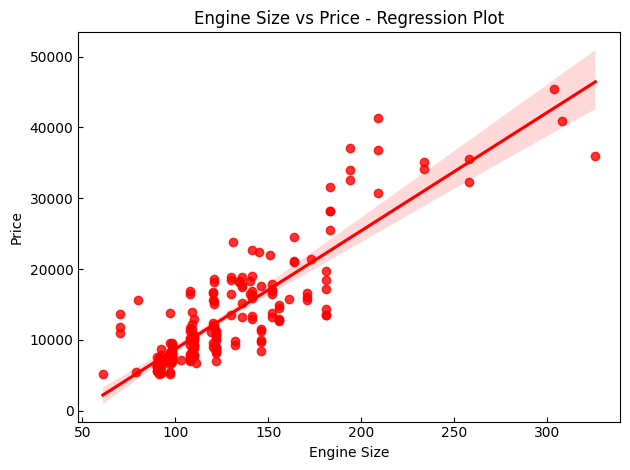

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x = 'engine-size', y = 'price', data = df_clean, color = 'r', )

ax.set_title('Engine Size vs Price - Regression Plot')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Price')
ax.tick_params(axis = 'both', direction = 'in')

fig.tight_layout()
fig.show()

### Multiple linear regression

The multiple linear regression is a method for fitting data that consists of using multiple predictors for a given target variable. 

The more relevant data you have from the predictor variables, the more accurate you model can be.

The MLR can be defined as follows:

$$ y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + {...} + b_{n}x_{n} $$

Where $x_{1}, x_{2}, {...}, x_{n}$ are the independent variables, or predictors, that are weighted by the parameters $(b_{0}, b_{1}, {...}, b_{n})$ that makes the model unique for the target variable we want to predict.

From the previous section we know that other good predictors of price could be:

- Horsepower
- Curb-weight
- Engine-size
- Highway-L/Km

Let's develop a model using these variables as the predictor variables.

In [ ]:
z = df_clean[['horsepower', 'curb-weight', 'engine-size', 'highway-L/Km']]

Fit the linear model using the four above-mentioned variables.


In [ ]:
lm.fit(z, df_clean['price'])

LinearRegression()

In [ ]:
(lm.intercept_).round(1)

-14382.2

In [ ]:
(lm.coef_).round(1)

array([ 36.8,   3.5,  85.3, 498.9])

Note that now the `lm.coef_` method returns an array of numbers, that are the parameters $(b_{0}, b_{1}, {...}, b_{n})$ for the fit.

We can write this model as follows:

$$ y = -14382.2 + 36.8x_{1} + 3.5x_{2} + 85.3x_{3} + 498.9x_{4} $$

where $x_{1}, x_{2}, x_{3}$ and $x_{4}$ corresponds to:

- Horsepower
- Curb-weight
- Engine-size
- Highway-L/Km

respectively.

### Model evaluation using visualization

<h4>Regression plot</h4>

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

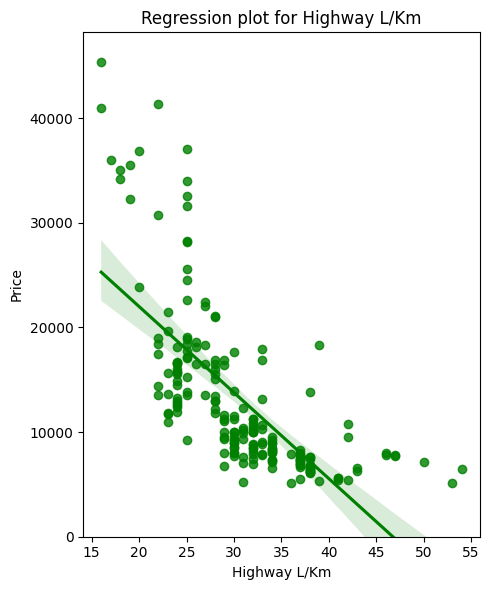

In [ ]:
fig, ax = plt.subplots(figsize = (5, 6))

sns.regplot(x = 'highway-mpg', y = 'price', data = df, color = 'g')
ax.set_ylim(0, )

ax.set_title ('Regression plot for Highway L/Km')
ax.set_xlabel('Highway L/Km')
ax.set_ylabel('Price')

fig.tight_layout()
fig.show()

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

### Residual plot

A good way to visualize the variance of the data is to use a residual plot.

**What is a residual?**

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

**So what is a residual plot?**

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

**What do we pay attention to when looking at a residual plot?**

We look at the spread of the residuals:

> If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

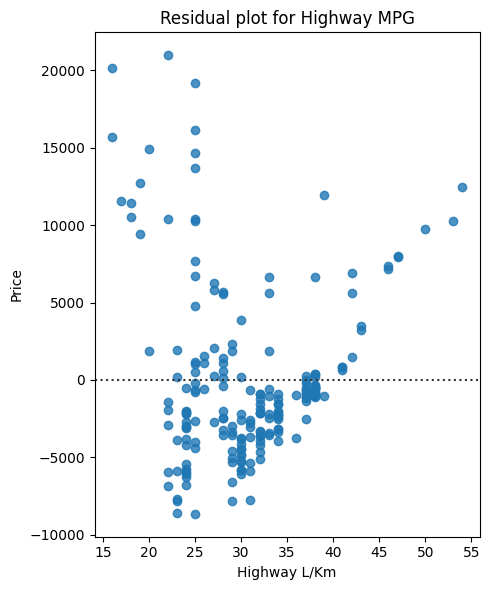

In [ ]:
fig, ax = plt.subplots(figsize = (5, 6))

sns.residplot(x = df['highway-mpg'], y = df['price'])

ax.set_title('Residual plot for Highway MPG')
ax.set_xlabel('Highway L/Km')
ax.set_ylabel('Price')

fig.tight_layout()
fig.show()

What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Distribution plots

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [ ]:
y_pred = lm.predict(z)

<ipython-input-98-9536052ac675>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-98-9536052ac675>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist = False, color = 'b', label = 'Fit

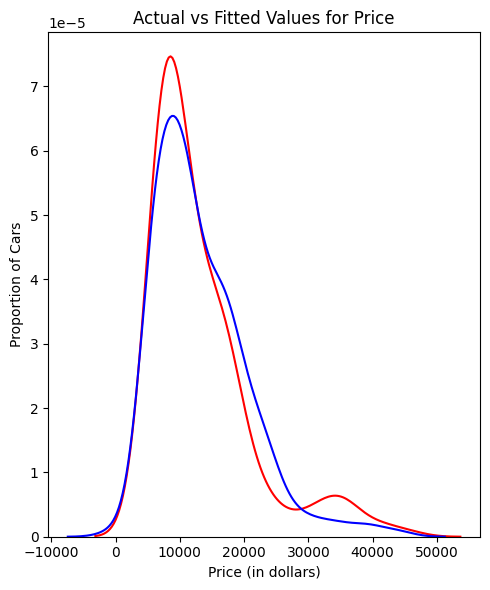

In [ ]:
fig, ax = plt.subplots(figsize = (5, 6))

# plot for the actual datapoints
ax = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')

# plot for the predictions
sns.distplot(y_pred, hist = False, color = 'b', label = 'Fitted values', ax = ax)

ax.set_title('Actual vs Fitted Values for Price')
ax.set_xlabel('Price (in dollars)')
ax.set_ylabel('Proportion of Cars')

fig.tight_layout()
fig.show()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

### Measures for in-sample evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h4>Simple linear regression</h4>

Calculating the R squared:

In [ ]:
x = df_clean[['horsepower']]
y = df_clean[['price']]

lm.fit(x, y)
print('The R-squared is:', lm.score(x, y).round(2))

The R-squared is: 0.66


We can say that ~66% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [ ]:
yhat = lm.predict(x)
print('The first four predicted values:', yhat[:4])

The first four predicted values: [[14517.17297231]
 [14517.17297231]
 [21922.47513036]
 [12967.226009  ]]


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true = df_clean['price'], y_pred = yhat)
print('The mean squared error of price and predicted value is:', mse.round(1))

The mean squared error of price and predicted value is: 21638825.8


<h4>Multiple linear regression</h4>



- R-squared

In [ ]:
lm.fit(z, df_clean['price'])
print('The R-squared is:', lm.score(z, df_clean['price']).round(2))

The R-squared is: 0.81


- MSE

In [ ]:
y_pred_mlr = lm.predict(z)

In [ ]:
print('The mean squared error of price and predicted value using multifit is:\n', 
      mean_squared_error(df_clean['price'], y_pred_mlr).round(2))

The mean squared error of price and predicted value using multifit is:
 11823374.64


### Decision Making: Determining a Good Model Fit

- **What is a good R-squared value?**
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.


- **What is a good MSE?**

</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

### Conclusion

<p>Comparing these two models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>